This notebook is used to test the `synth_cartan_many.py` file.

In [1]:
from qiskit_cartan.synth_cartan_many import *

In [2]:
# Generate many circuits, each corrsponding to a different ordering of factors in k.
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
test_heisenberg_ham = SparsePauliOp(["XXI", "YYI", "ZZI", "IXX", "IYY", "IZZ"], coeffs = [1,1,1,1,1,1])
test_time_evolve = 3
test_paulievolutiongate = PauliEvolutionGate(test_heisenberg_ham, time=test_time_evolve)
qc_list = synth_cartan_many(test_paulievolutiongate, 
                              random_seed=0,
                              size=200,
                              lexicographic=False)
print(qc_list)

Optimization terminated successfully.
         Current function value: -2.586419
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28
--- 0.09059810638427734 seconds ---
Optimization Error:
1.5472206234539515e-12
Optimization terminated successfully.
         Current function value: -2.586419
         Iterations: 30
         Function evaluations: 36
         Gradient evaluations: 36
--- 0.11153841018676758 seconds ---
Optimization Error:
4.608343995757894e-12
Optimization terminated successfully.
         Current function value: -0.271988
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
--- 0.029559850692749023 seconds ---
Optimization Error:
1.073195825247197e-10
Optimization terminated successfully.
         Current function value: -2.586419
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19
--- 0.053991079330444336 seconds ---
Optimization Error:
6.18509708376490

In [3]:
# Feed each of the circuits above into a preset pass manager and get #CXs. 

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import CouplingMap

# This function is used to quickly generate a preset pass manager. 
# A preset pass manager are the default pass managers used by the transpile() function.
pm = generate_preset_pass_manager(optimization_level=2, 
                                    coupling_map=CouplingMap([[0, 1], [1,0], [1, 2], [2,1]]), 
                                    routing_method="sabre",
                                    translation_method="unroller",
                                    basis_gates="['u1', 'u2', 'u3', 'cx']",
                                    seed_transpiler=0)

num_cx_list = []

for qc in qc_list:
 
    qc_l = pm.layout.run(qc) # SABRE layout
    qc_r = pm.routing.run(qc_l)
    qc_t = pm.translation.run(qc_r)
    qc_o = pm.optimization.run(qc_t) # optimization techniques

    num_cx_list.append(qc_o.count_ops()["cx"]) # number of CNOTs

(array([ 65.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 135.]),
 array([50. , 50.4, 50.8, 51.2, 51.6, 52. , 52.4, 52.8, 53.2, 53.6, 54. ]),
 <BarContainer object of 10 artists>)

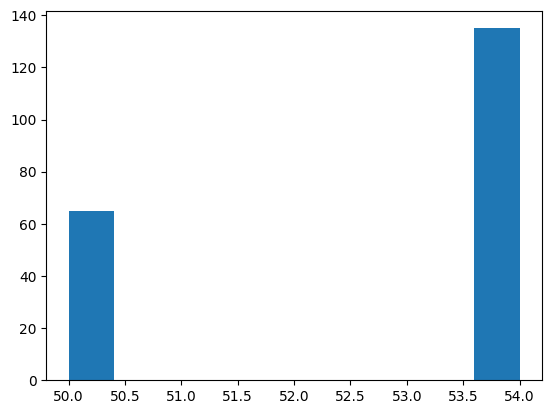

In [4]:
from matplotlib import pyplot as plt
plt.hist(num_cx_list)

In [5]:
# Compare above distribution of CXs to the single value obtained by a lexicographic ordering of factors in k.
# The lexicographic ordering is unique.
qc_list_lexicographic = synth_cartan_many(test_paulievolutiongate, 
                              random_seed=0,
                              size=1,
                              lexicographic=True)

qc_l = pm.layout.run(qc_list_lexicographic[0]) # SABRE layout
qc_r = pm.routing.run(qc_l)
qc_t = pm.translation.run(qc_r)
qc_o = pm.optimization.run(qc_t) # optimization techniques

print(qc_o.count_ops())

Optimization terminated successfully.
         Current function value: -2.586419
         Iterations: 24
         Function evaluations: 30
         Gradient evaluations: 30
--- 0.08513569831848145 seconds ---
Optimization Error:
5.5069833333252636e-11
OrderedDict([('cx', 54), ('u', 24), ('u1', 15), ('u2', 12), ('barrier', 2)])
